# Weather Data - Exploratory Data Analysis
## Data Science - CS 334
--------------------------------------------

- In this part of the assignment we will perform some investigations to discover the hidden patterns/trends, verify assumptions with the help of statistics and graphical representations in the data.
- Use the cleaned `weather_data` file to do this part.

### Importing Libraries
---------------------------

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.lines import Line2D
sns.set()

In [4]:
df = pd.read_pickle('weather_clean.pkl')
print(df.shape)
df.head()

(366, 23)


CloudCover     Events  Max.Dew.PointF  Max.Gust.SpeedMPH  Max.Humidity  \
0         6.0       Rain            46.0               29.0          74.0   
1         7.0  Rain-Snow            40.0               29.0          92.0   
2         8.0       Rain            49.0               38.0         100.0   
3         3.0       None            24.0               33.0          69.0   
4         5.0       Rain            37.0               26.0          85.0   

   Max.Sea.Level.PressureIn  Max.TemperatureF  Max.VisibilityMiles  \
0                     30.45              64.0                 10.0   
1                     30.71              42.0                 10.0   
2                     30.40              51.0                 10.0   
3                     30.56              43.0                 10.0   
4                     30.68              42.0                 10.0   

   Max.Wind.SpeedMPH  Mean.Humidity  ...  Mean.Wind.SpeedMPH  MeanDew.PointF  \
0               22.0           63.0  ...                13.0            40.0   
1               24.0           72.0  ...                15.0            27.0   
2               29.0           79.0  ...                12.0            42.0   
3               25.0           54.0  ...                12.0            21.0   
4               22.0           66.0  ...                10.0            25.0   

   Min.DewpointF  Min.Humidity  Min.Sea.Level.PressureIn  Min.TemperatureF  \
0           26.0          52.0                     30.01              39.0   
1           17.0          51.0                     30.40              33.0   
2           24.0          57.0                     29.87              37.0   
3           13.0          39.0                     30.09              30.0   
4           12.0          47.0                     30.45              26.0   

   Min.VisibilityMiles  PrecipitationIn  WindDirDegrees       Date  
0                 10.0             0.01           268.0 2014-12-01  
1                  2.0             0.10            62.0 2014-12-02  
2                  1.0             0.44           254.0 2014-12-03  
3                 10.0             0.00           292.0 2014-12-04  
4                  5.0             0.11            61.0 2014-12-05  

[5 rows x 23 columns]

You can see the statistics for all the columns using the `describe` function in pandas.

In [5]:
df.describe(include='all')

CloudCover Events  Max.Dew.PointF  Max.Gust.SpeedMPH  Max.Humidity  \
count   366.000000    366      366.000000         366.000000    366.000000   
unique         NaN     12             NaN                NaN           NaN   
top            NaN   None             NaN                NaN           NaN   
freq           NaN    201             NaN                NaN           NaN   
first          NaN    NaN             NaN                NaN           NaN   
last           NaN    NaN             NaN                NaN           NaN   
mean      4.707650    NaN       45.475410          26.964481     83.226776   
std       2.373206    NaN       18.317241           8.566747     14.277886   
min       0.000000    NaN       -6.000000           0.000000     39.000000   
25%       3.000000    NaN       32.000000          21.000000     73.250000   
50%       5.000000    NaN       47.500000          25.500000     86.000000   
75%       7.000000    NaN       61.000000          31.000000     93.000000   
max       8.000000    NaN       75.000000          94.000000    100.000000   

        Max.Sea.Level.PressureIn  Max.TemperatureF  Max.VisibilityMiles  \
count                 366.000000        366.000000           366.000000   
unique                       NaN               NaN                  NaN   
top                          NaN               NaN                  NaN   
freq                         NaN               NaN                  NaN   
first                        NaN               NaN                  NaN   
last                         NaN               NaN                  NaN   
mean                   30.155328         58.931694             9.907104   
std                     0.232095         20.047156             0.707768   
min                    29.580000         18.000000             2.000000   
25%                    30.000000         42.000000            10.000000   
50%                    30.140000         60.000000            10.000000   
75%                    30.310000         76.000000            10.000000   
max                    30.880000         96.000000            10.000000   

        Max.Wind.SpeedMPH  Mean.Humidity  ...  Mean.Wind.SpeedMPH  \
count          366.000000     366.000000  ...          366.000000   
unique                NaN            NaN  ...                 NaN   
top                   NaN            NaN  ...                 NaN   
freq                  NaN            NaN  ...                 NaN   
first                 NaN            NaN  ...                 NaN   
last                  NaN            NaN  ...                 NaN   
mean            20.620219      66.021858  ...           10.680328   
std              5.762945      14.433392  ...            3.491515   
min              8.000000      28.000000  ...            4.000000   
25%             16.000000      56.000000  ...            8.000000   
50%             20.000000      66.000000  ...           10.000000   
75%             24.000000      76.750000  ...           13.000000   
max             38.000000      98.000000  ...           22.000000   

        MeanDew.PointF  Min.DewpointF  Min.Humidity  Min.Sea.Level.PressureIn  \
count       366.000000     366.000000    366.000000                366.000000   
unique             NaN            NaN           NaN                       NaN   
top                NaN            NaN           NaN                       NaN   
freq               NaN            NaN           NaN                       NaN   
first              NaN            NaN           NaN                       NaN   
last               NaN            NaN           NaN                       NaN   
mean         38.959016      32.245902     48.308743                 29.925956   
std          19.870153      21.811639     17.414221                  0.241768   
min         -11.000000     -18.000000     16.000000                 29.160000   
25%          24.000000      16.250000     35.000000                 29.760000   
50%   

## Distributions + Correlation
------------------------------------

#### Use plots to support your findings.
- The world of Data Science revolves around the probability distributions and the core of probability distribution is focused on Normal distributions.This is from where we draw our assumptions about a feature/variable and make hypothesis. So which variables are normally distributed in this data? Do you see any variables which shows bi-modal distribution? Tri-modal?
- In reality, data is not always spread consistently. One of the reasons might be that there is not sufficient information available from one group of data. Another reason might be that if data is collected through forms/devices then some people might choose to not enter the data or the device might be faulty. Hence, we need to know whether there is any feature in the data which is skewed. Are there any variables which are skewed? If yes then plot those.
- Is Gust Speed effected by any other variable in the data? If yes, then which column/columns? 
- Show the relatioship between all the variables. Explain these relations. (Linear, positive, negative, not-related,etc)
- How can we detect multicollinearity? Which plot can be used? Which variables fall under this? [Click here to read up on `multi-collinearity`](https://towardsdatascience.com/multicollinearity-in-data-science-c5f6c0fe6edf) since we haven't covered this in class. Google is your friend so use it!

### Distributions 

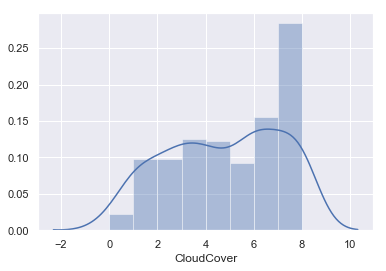

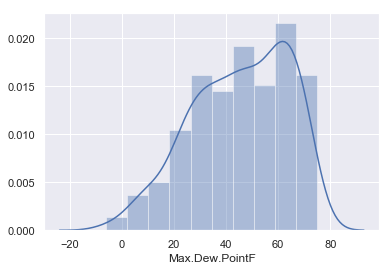

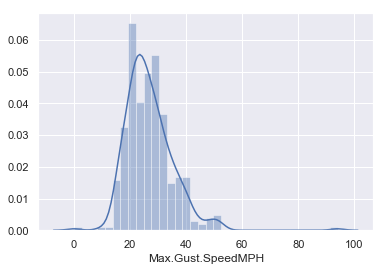

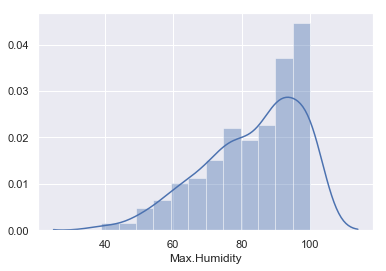

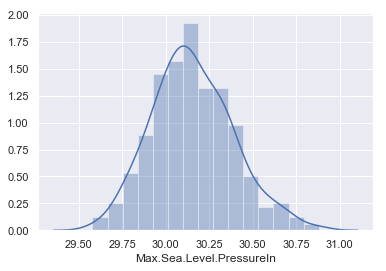

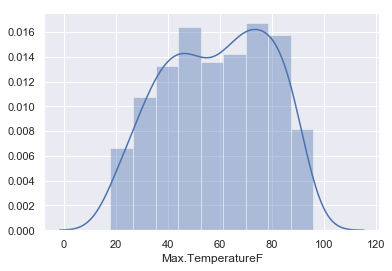

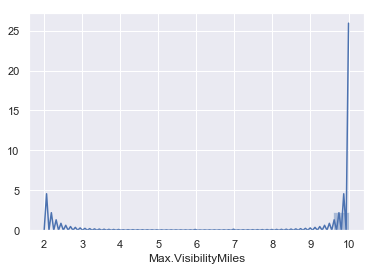

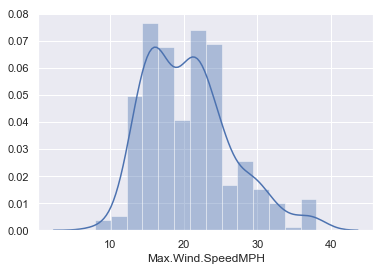

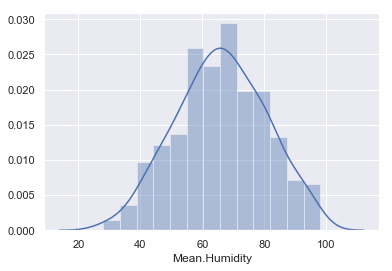

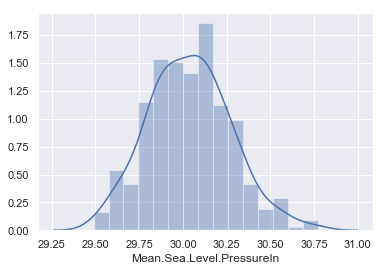

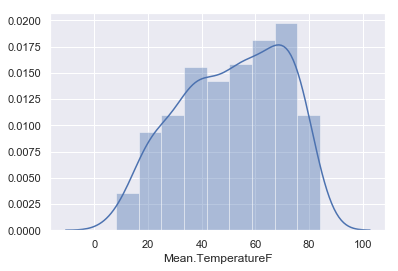

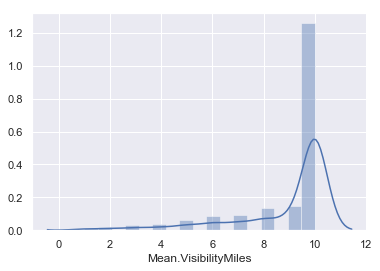

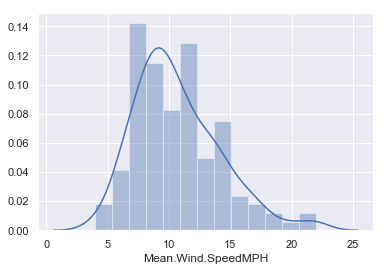

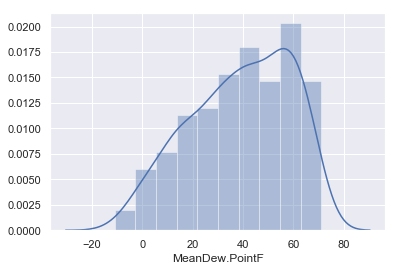

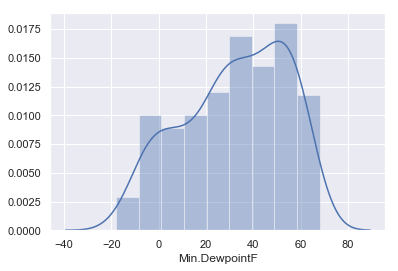

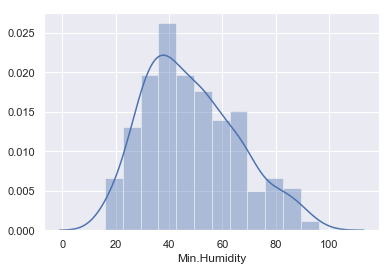

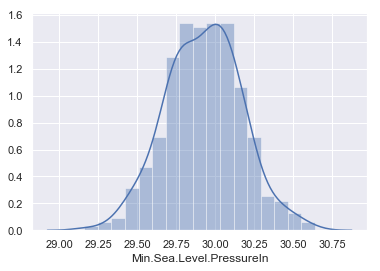

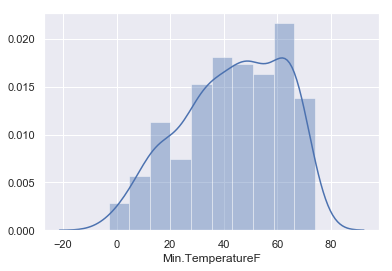

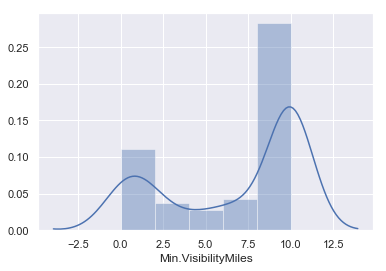

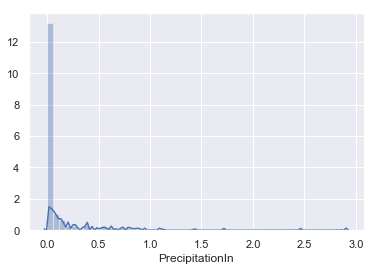

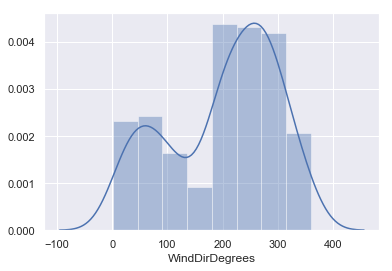

In [29]:
cols = df.columns
cols = cols.drop(["Events","Date"])
# print (cols)

for each in cols:
    fig, ax  = plt.subplots()
    sns.distplot(df[each])

#### Classifications


- <b>CloudCover</b> BiModal
- <b>Max.Dew.PointF</b> BiModal
- <b>Max.Gust.SpeedMPH</b> Positive Skewed
- <b>Max.Humidity</b> Negative Skewed
- <b>Max.Sea.Level.PressureIn</b> Normal
- <b>Max.TemperatureF</b> BiModal
- <b>Max.VisibilityMiles</b> Negative Skewed
- <b>Max.Wind.SpeedMPH</b> BiModal
- <b>Mean.Humidity</b> Normal
- <b>Mean.Sea.Level.PressureIn</b> Normal
- <b>Mean.TemperatureF</b> BiModal
- <b>Mean.VisibilityMiles</b> Negative Skewed
- <b>Mean.Wind.SpeedMPH</b> Normal
- <b>MeanDew.PointF</b> Normal
- <b>Min.DewpointF</b> TriModal
- <b>Min.Humidity</b> Normal
- <b>Min.Sea.Level.PressureIn</b> Normal
- <b>Min.TemperatureF</b> 
- <b>Min.VisibilityMiles</b> BiModal
- <b>PrecipitationIn</b> Positive Skewed
- <b>WindDirDegrees</b> BiModal

### Skewness 

NOTE: -ve skew means mass of the distribution is concentrated on the right while +ve skew means the opposite
This plot confirms the skewed classifications in the above section


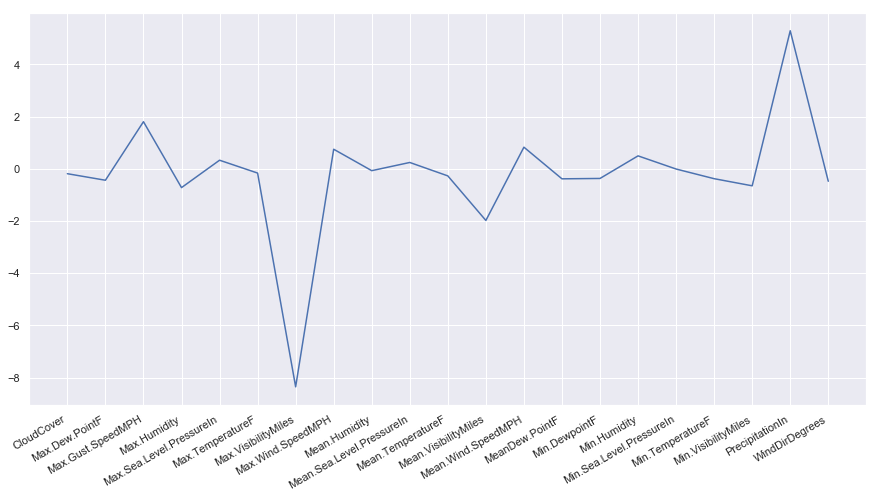

In [28]:
print ("NOTE: -ve skew means mass of the distribution is concentrated on the right while +ve skew means the opposite")
print ("This plot confirms the skewed classifications in the above section")
f1, axx = plt.subplots(figsize=(15, 8))
axx.plot(df.skew())
f1.autofmt_xdate()

### Is Gust Speed affected by other variables?

Max.Gust.SpeedMPH
CloudCover                          0.031493
Max.Dew.PointF                     -0.170611
Max.Gust.SpeedMPH                   1.000000
Max.Humidity                       -0.053904
Max.Sea.Level.PressureIn           -0.137283
Max.TemperatureF                   -0.155905
Max.VisibilityMiles                -0.036694
Max.Wind.SpeedMPH                   0.819651
Mean.Humidity                      -0.156072
Mean.Sea.Level.PressureIn          -0.293154
Mean.TemperatureF                  -0.202039
Mean.VisibilityMiles               -0.223010
Mean.Wind.SpeedMPH                  0.734312
MeanDew.PointF                     -0.227213
Min.DewpointF                      -0.295010
Min.Humidity                       -0.212233
Min.Sea.Level.PressureIn           -0.372979
Min.TemperatureF                   -0.246734
Min.VisibilityMiles                -0.196936
PrecipitationIn                     0.226715
WindDirDegrees                      0.230571

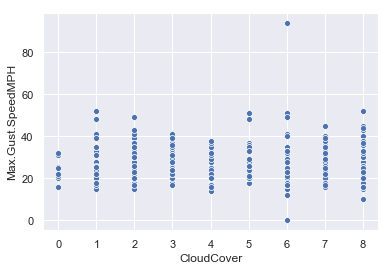

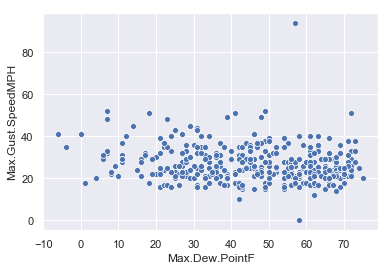

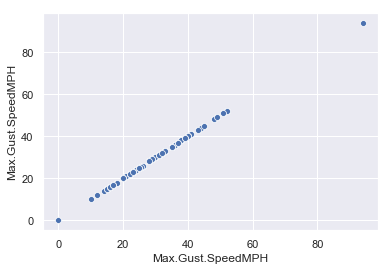

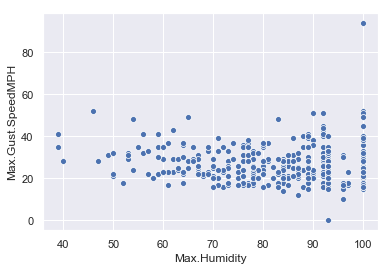

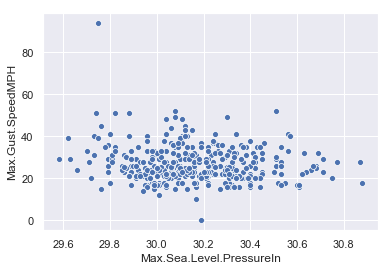

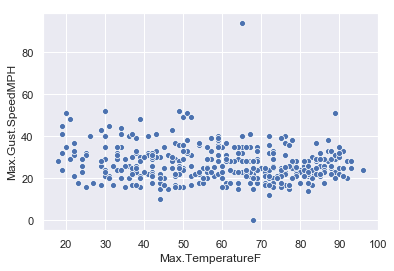

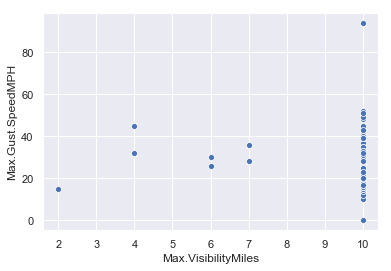

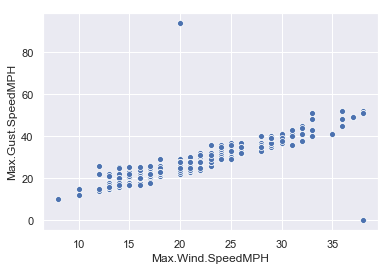

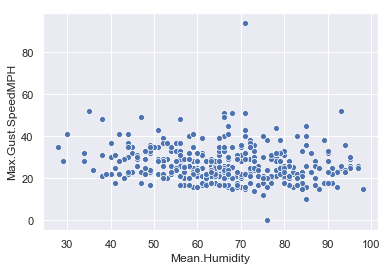

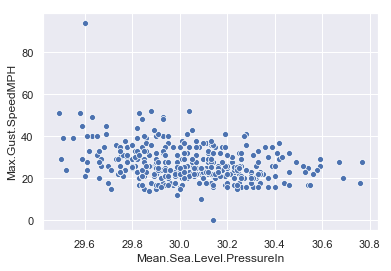

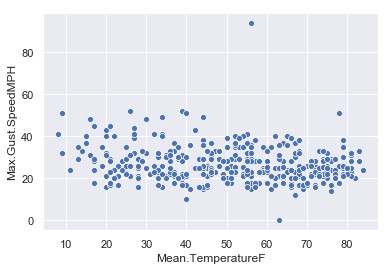

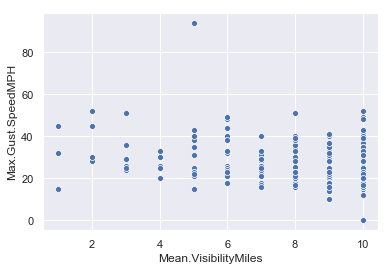

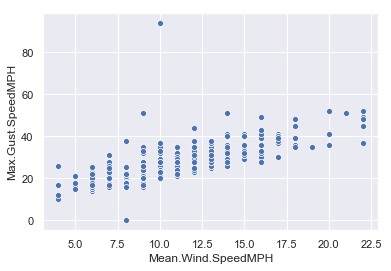

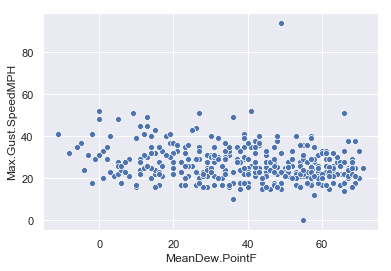

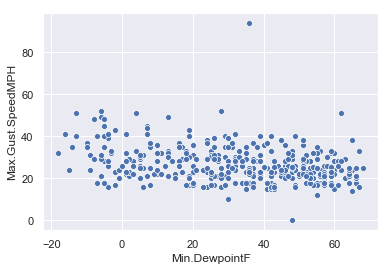

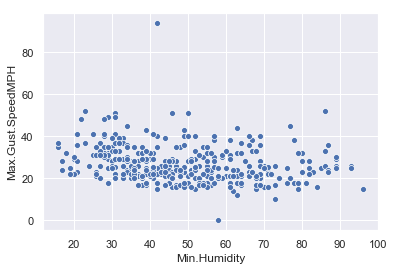

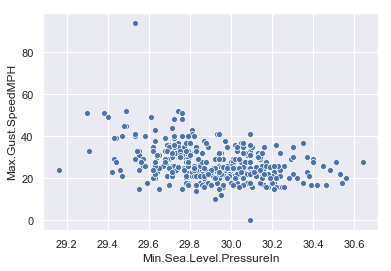

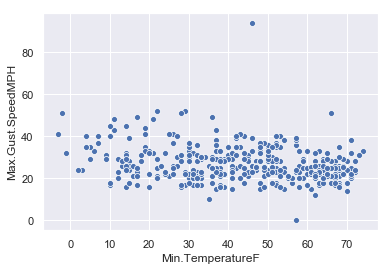

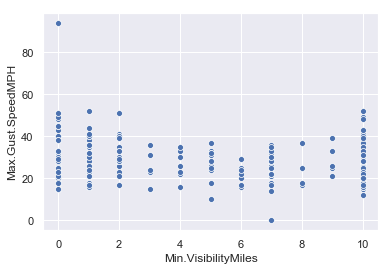

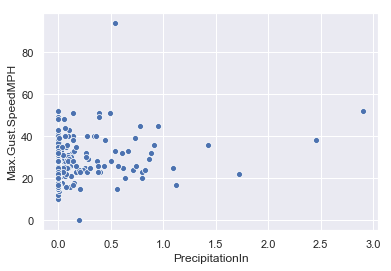

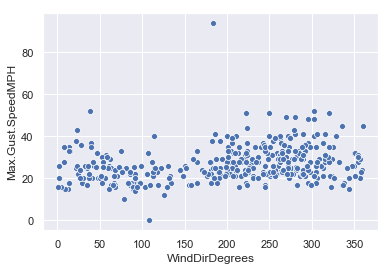

In [33]:
display(df.corr()[["Max.Gust.SpeedMPH"]])

gust_cols = df.columns.drop(["Events","Date"])
for each in cols:
    fig, ax  = plt.subplots()
    sns.scatterplot(x = df[each], y= df["Max.Gust.SpeedMPH"])

- The graphs above support what we found in the correlation values that precede them
- <b>Max.Gust.Speed.MPH</b> has strong positive linear relationships with:
   - `Mean.Wind.Speed.MPH`
   - `Max.Wind.Speed.MPH`

###  Visualizing Relationships (Linear, Positive, Negative)

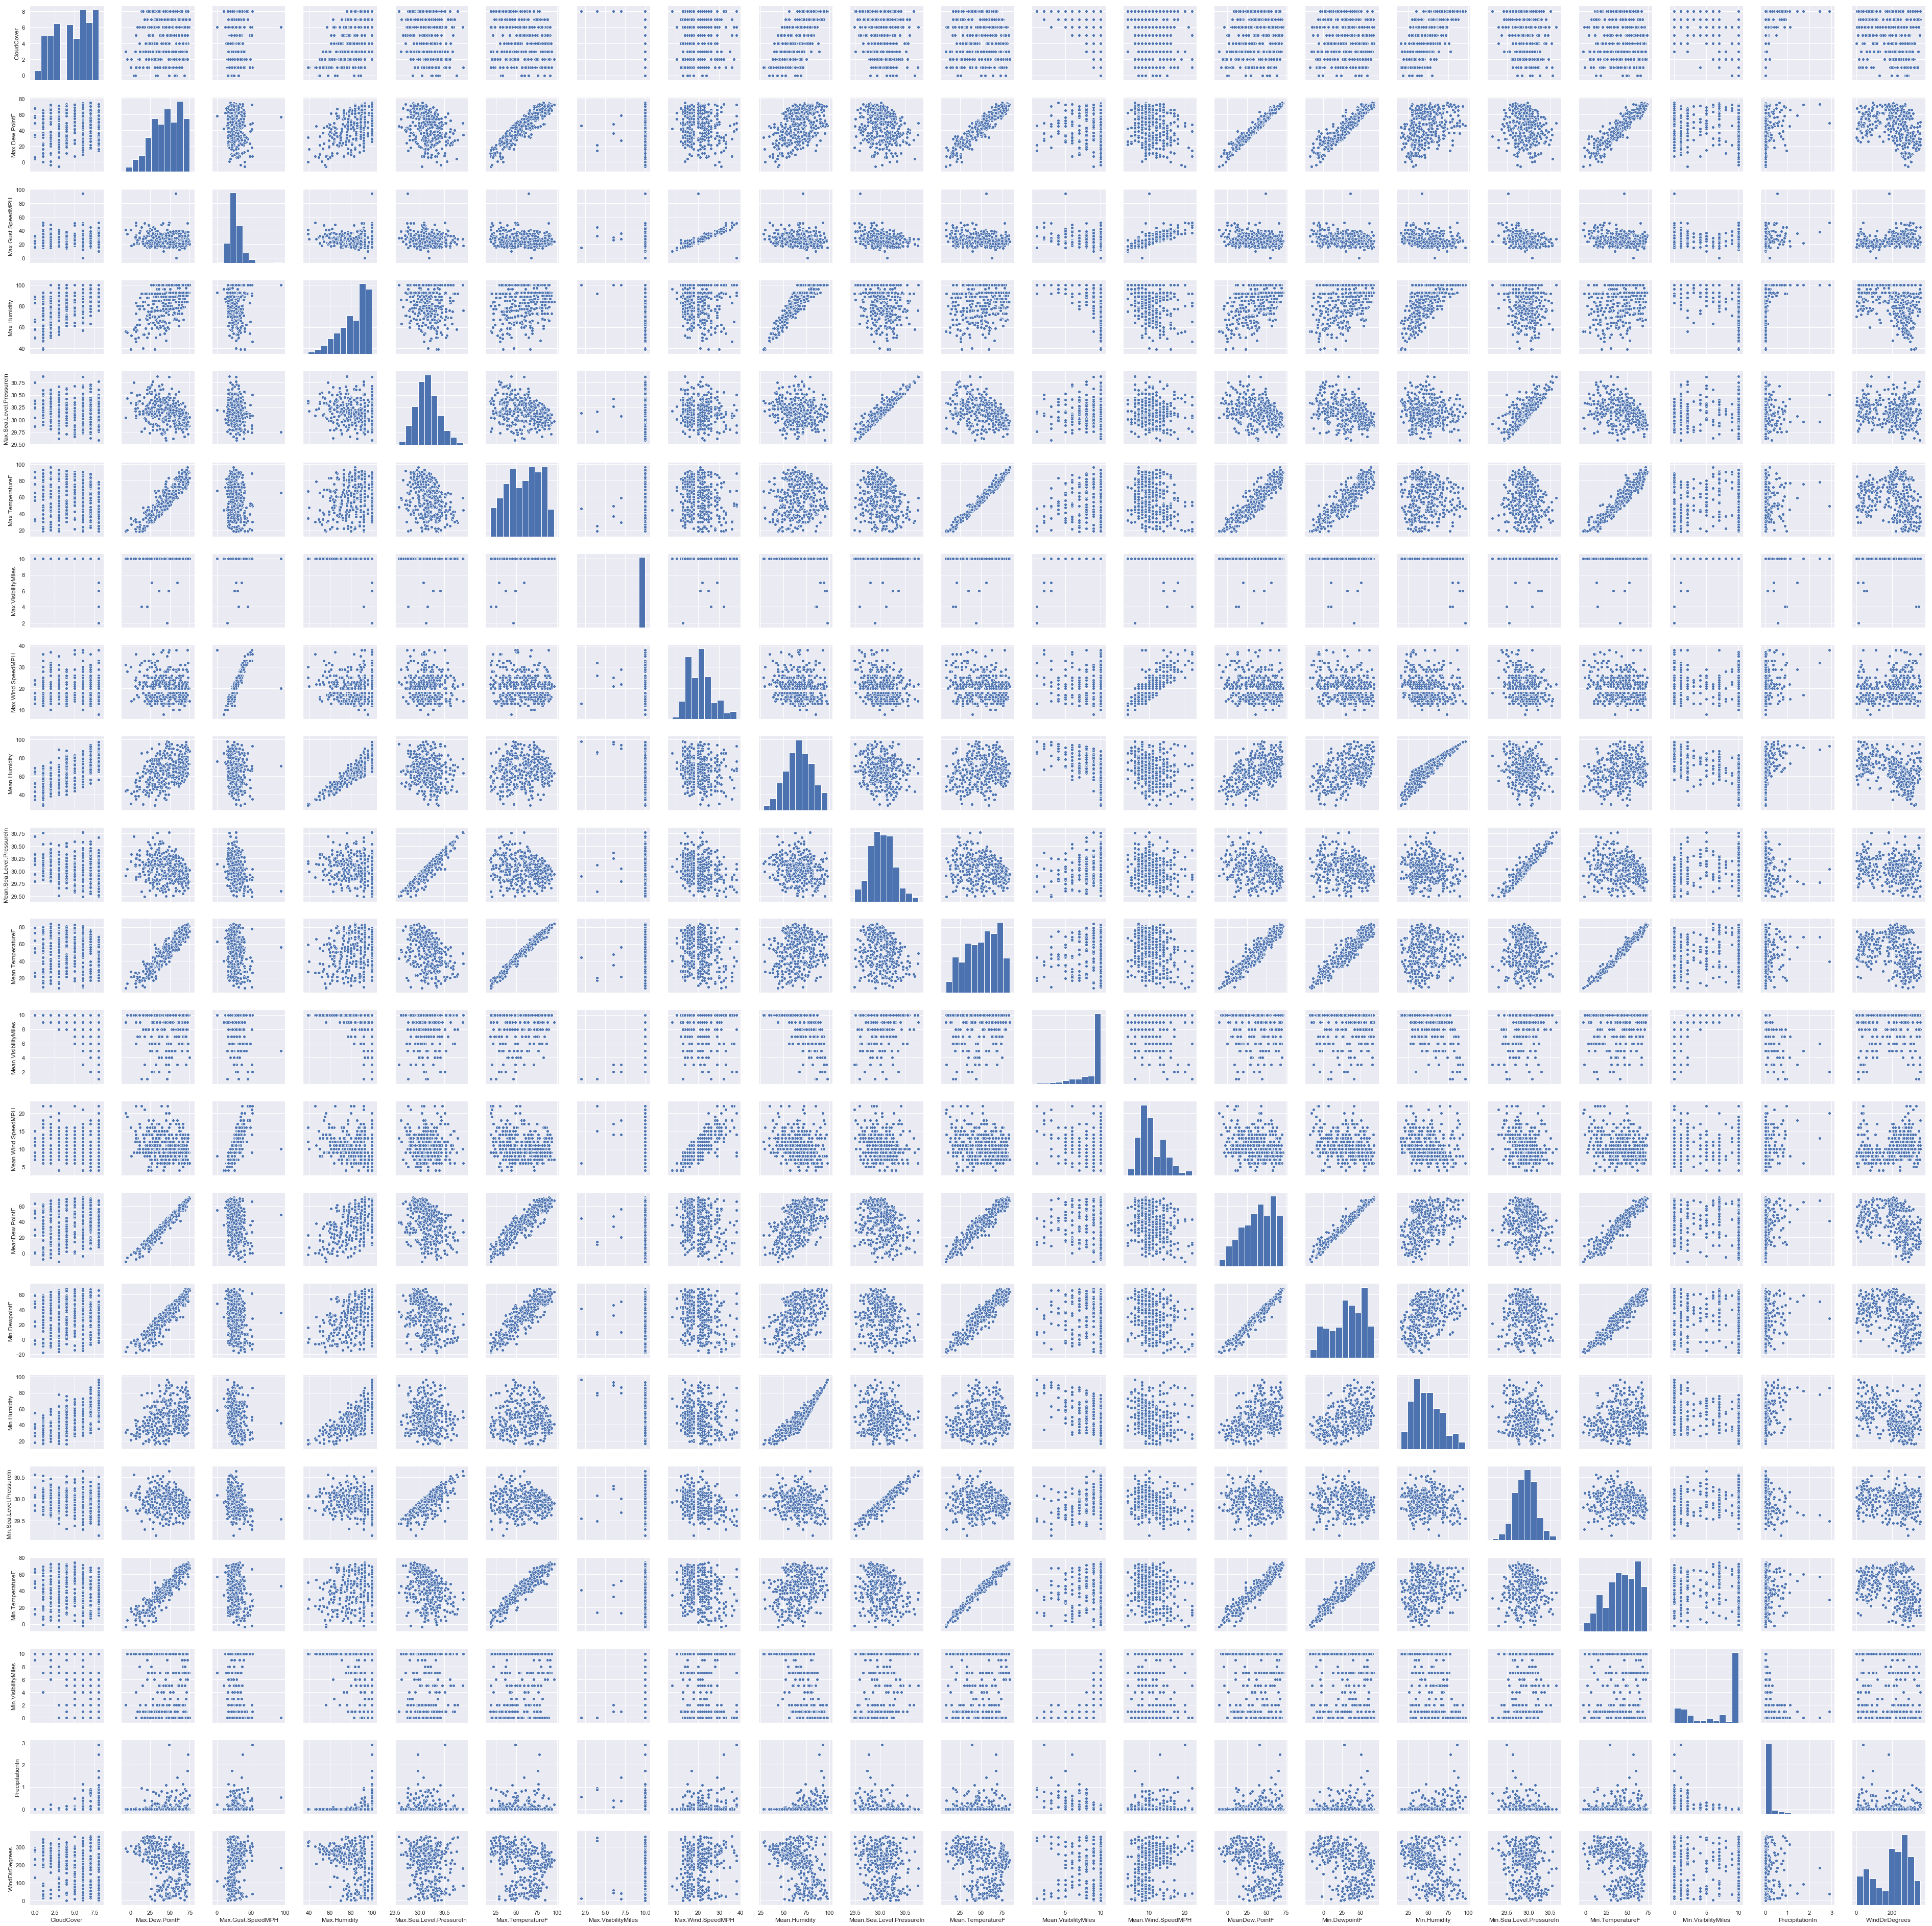

In [39]:
r_cols = df.columns.drop(["Events","Date"])
sns.pairplot(df[r_cols])

- Examples of Positive Linear Relationships:
    - <b>Dew Point</b> Variables and <b>TemperatureF</b> Variables 
- Examples of Negative Linear Relationships:
    - <b>Cloud Cover</b> and <b>Min Visibility Miles</b>
    - <b>Min Visibility Miles</b> and <b>Max Humidity</b>

### Confusion Matrix for Multicollinearity 

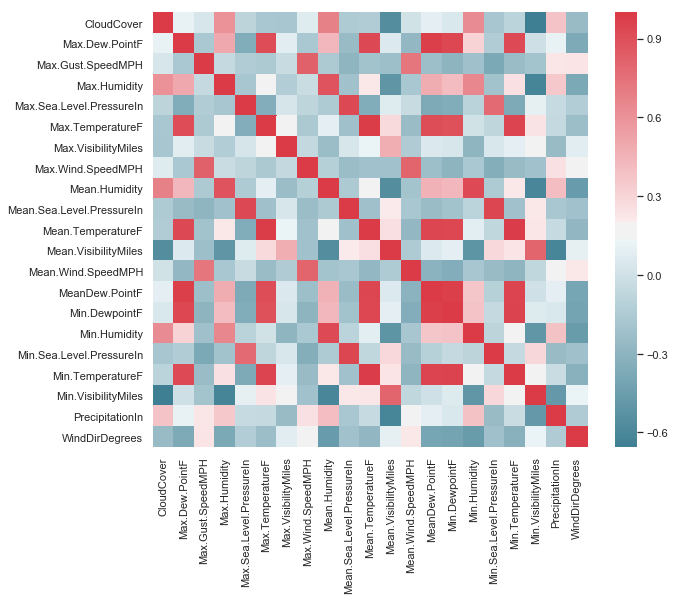

In [31]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax)

- Confusion Matrix is a good way to identify incidents of Multicollinearity
- Another way of checking for Multicollinearity could be employing the Variance Inflation Factor

## General Observations
----------------------------

### Which events are most common? 

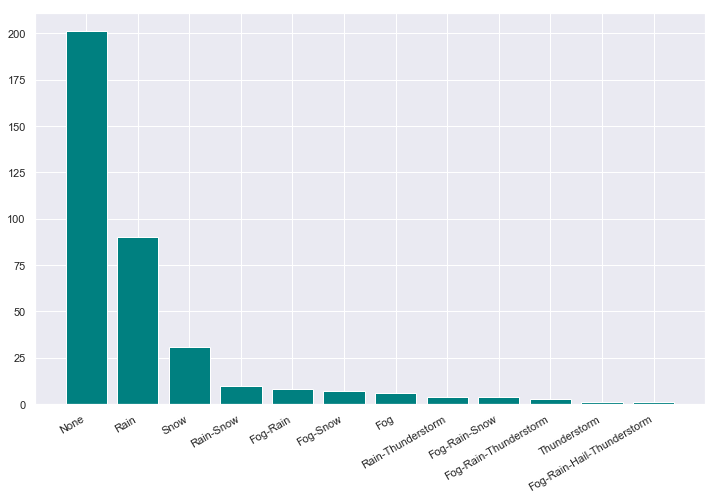

In [82]:
fig, ax = plt.subplots(figsize = (12,8))
plt.bar((df["Events"].value_counts().index.tolist()), (df["Events"].value_counts().values.tolist()), color = 'teal')
fig.autofmt_xdate()

- Rain was the most frequently occuring event
- Thunderstorm and Fog-Rain-Hail-Thunderstorm were the least occuring events
- There was no weather event on 200 days in the given dataset

### Relation of Events with other Variables 

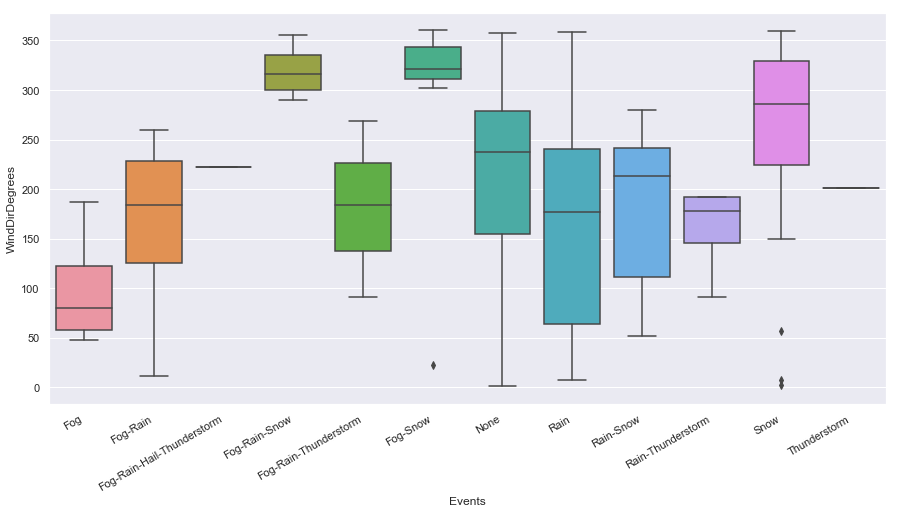

In [104]:
figer, axer = plt.subplots(figsize = (15,8)) 
sns.boxplot(x = "Events", y = "WindDirDegrees", data = df)
figer.autofmt_xdate()

- The Mean Temperature was the <b>lowest</b> in any combination of Events that involved <b>Snow</b>

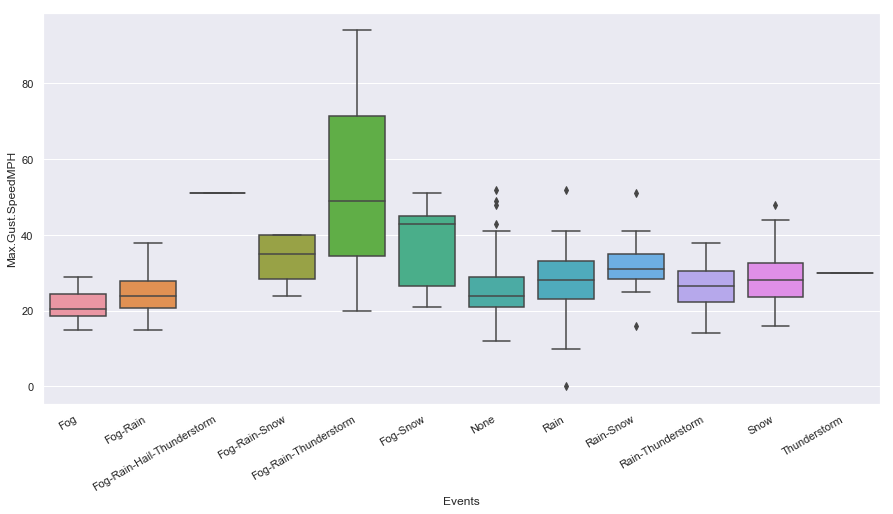

In [98]:
figer, axer = plt.subplots(figsize = (15,8)) 
sns.boxplot(x = "Events", y = "Max.Gust.SpeedMPH", data = df)
figer.autofmt_xdate()

- Gust speed was the <b>highest</b> in the combination of events <b>Fog-Rain-Thunderstorm</b>

### Miscellaneous 

- As can be seen from the confusion matrix in the multi-collinearity section:
    - The Visibility decreased as the Cloud Cover increased.
    - When the Wind Speed increased, so did the Gust Speed.
    - As the Precipitation increased, Visibility decreased.
    - As the Temperature increased, so did the Dew Point

## Time Plots
------------

In [19]:
df['Date'].min(), df['Date'].max()

(Timestamp('2014-12-01 00:00:00'), Timestamp('2015-12-01 00:00:00'))

So the time period of the data is a whole year from December 2014 to December 2015. 

### Temperature all around the year
#### Use plots to support your findings.

-  We want to figure out the hottest and coldest months of the year and also identify the seasons as well. Time plots will help us to answer these questions.
- How does the temprature vary between the months? Draw a plot and explain the trend. Also show the mean and median value of temprature on the plot as well. `Hint:` Using Horizontal lines
- Now we want to show how much the temprature varies on the same plot. Hint: See the matplotlib or documentation to calculate and plot the variation of the temprature on the same plot using the standard deviation.
- For each month find the `Mean.TemperatureF` and show the trend using a scatter plot. What can you observe?
- Is there any trend by how the `Mean.TemperatureF` changes with days of a week? Which day is the coldest and which is the hottest according to the data?
- ----------

- From June to August, show the correlation between `Mean.VisibilityMiles` and `Mean.Humidity` if there is any using a single plot. `Hint:` Use a line plot. Is there anything interesting that you observe?
- Use `rolling mean` to show the change of `Mean.TemperatureF` weekly and monthly all year round. (Weakly rolling mean and Monthly rolling mean.)
- Use a suitable visualization to show counts of different `Events` per month. Which event occured the most and during which month?
- For each month, plot the minimum, maximum and average temperature. Do you see any trends? Draw a comparison between the values for all the months.
- Plot the temperature of hottest and coldest day of every month on same plot.

In [45]:
months = ["Dec14", "Jan14", "Feb14", "Mar14", "Apr14", "May14", "Jun14", "July14", "Aug14", "Sep14", "Oct14", "Nov14", "Dec15"]

### How does temperature vary between months? Mean + Median + Variation

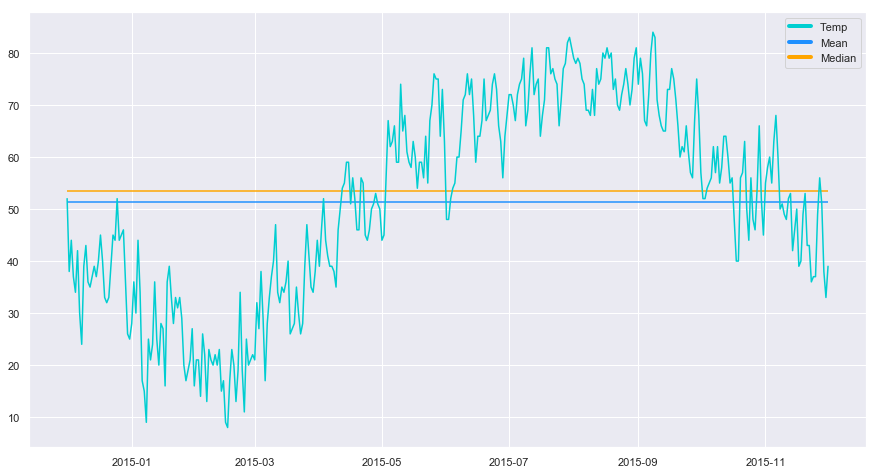

In [130]:
# plt.plot(df['Date'], df['Max.TemperatureF'],color='lightgreen')
# plt.plot(df['Date'], df['Min.TemperatureF'],color='purple')
fig, ax  = plt.subplots(figsize=(15, 8))
ax.plot(df['Date'], df['Mean.TemperatureF'],color='darkturquoise')
ax.hlines(df['Mean.TemperatureF'].mean(),df['Date'].min(), df["Date"].max(), color = "dodgerblue")
ax.hlines(df['Mean.TemperatureF'].median(),df['Date'].min(), df["Date"].max(), color = "orange")

custom_lines = [Line2D([0], [0], color='darkturquoise', lw=4), Line2D([0], [0], color="dodgerblue", lw=4), Line2D([0], [0], color="orange", lw=4)]
ax.legend(custom_lines, ['Temp', 'Mean', 'Median'])

- The coldest month seems to be <b>February</b>
- The temperature starts to pick up immediately after, in <b>March</b>
- The hottest month seems to be <b>August</b>
- The temperature starts to drop after that

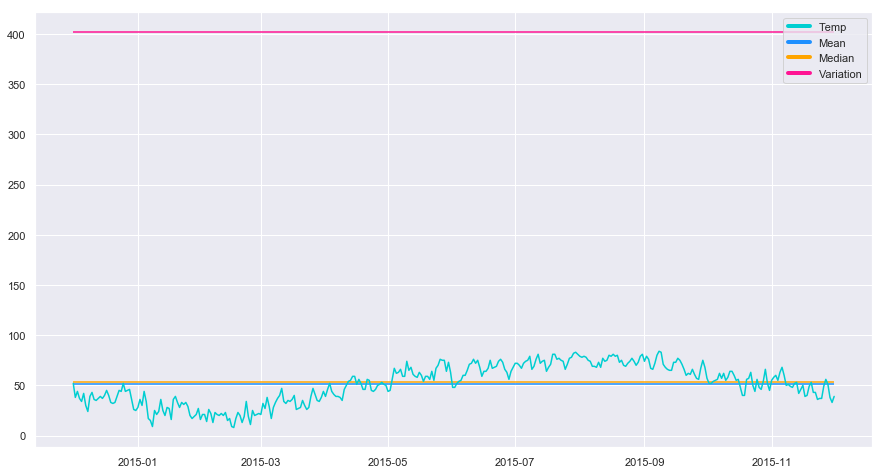

In [131]:
ax.hlines(df['Mean.TemperatureF'].var(),df['Date'].min(), df["Date"].max(), color = "deeppink")
# ax.plot(df['Date'], df['Max.TemperatureF']-df['Min.TemperatureF'],color='deeppink')

custom_lines = [Line2D([0], [0], color='darkturquoise', lw=4),Line2D([0], [0], color="dodgerblue", lw=4),Line2D([0], [0], color="orange", lw=4),Line2D([0], [0], color="deeppink", lw=4)]
ax.legend(custom_lines, ['Temp', 'Mean', 'Median', "Variation"])
fig

### Mean Temperature for every month scatter 

Text(0.5, 0, 'Month')

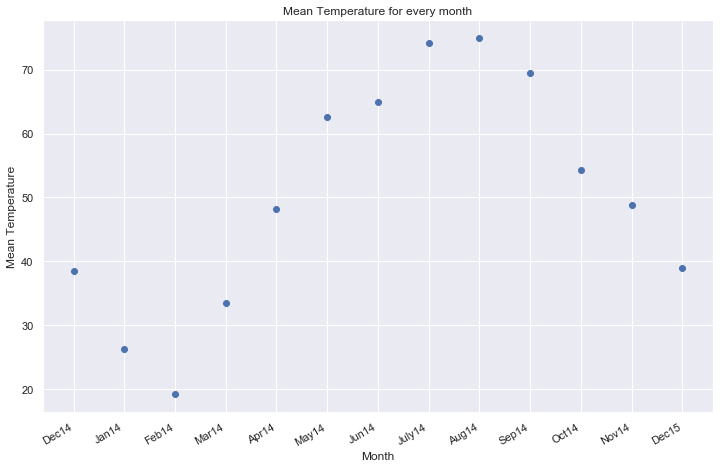

In [46]:
# figs, axs  = plt.subplots(figsize=(20, 8))
mean_t = df.groupby(pd.Grouper(key= "Date", freq='M', sort = True))[["Mean.TemperatureF"]].agg(np.mean)
# display(mean_t)
figmts, axmts  = plt.subplots(figsize=(12, 8))
plt.scatter(months, mean_t["Mean.TemperatureF"])
figmts.autofmt_xdate()
axmts.set_title("Mean Temperature for every month")
axmts.set_ylabel("Mean Temperature")
axmts.set_xlabel("Month")

- <b>February</b> is the Coldest Month
- <b>August</b> is the Hottest Month

### How does Mean Temperature change with Days of the week? 

Text(0.5, 0, 'Day')

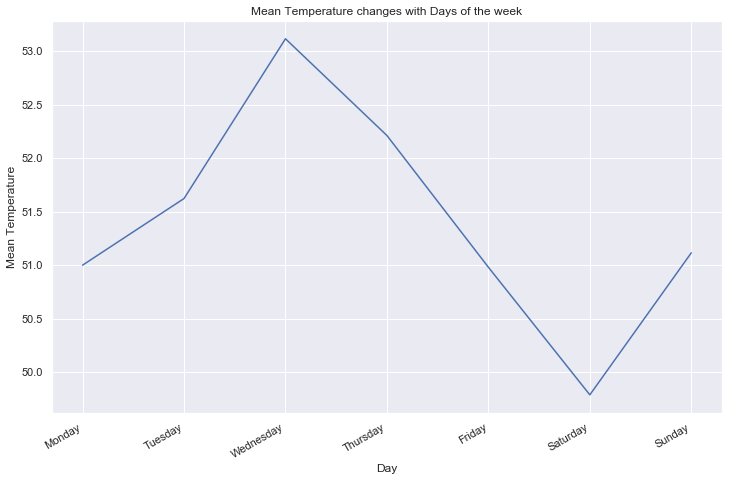

In [41]:
df["DayOfWeek"] = df["Date"].dt.day_name()
daily = pd.pivot_table(df, index = ["DayOfWeek"], values = ["Mean.TemperatureF"], aggfunc = np.mean).reindex(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])

figd, axd  = plt.subplots(figsize=(12, 8))
plt.plot(daily.index, daily["Mean.TemperatureF"])
figd.autofmt_xdate()
axd.set_title("Mean Temperature changes with Days of the week")
axd.set_ylabel("Mean Temperature")
axd.set_xlabel("Day")

The mean temperature consistently drops up until <b>Saturday</b>, after which it starts getting hotter, reaching the max on <b>Wednesday</b>

- <b> Hottest Day: </b> Wednesday
- <b> Coldest Day: </b> Saturday



### Line plot for correlation of Mean Visibility Miles and Mean Humidity 

Text(0.5, 0, 'Mean Humidity')

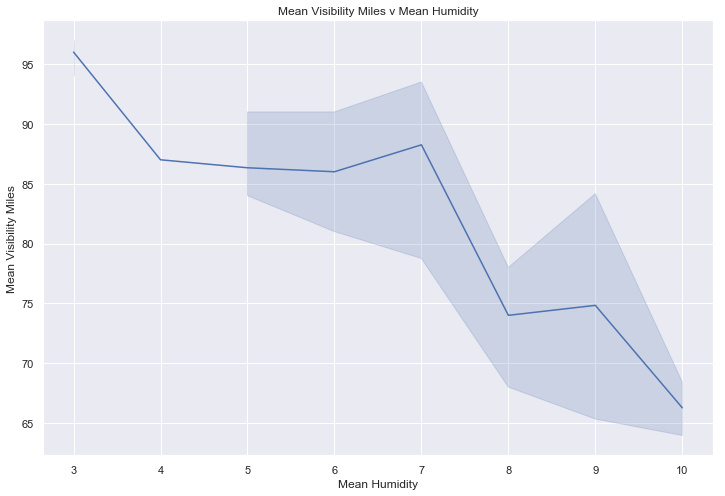

In [7]:
jun2aug = df[(df["Date"].dt.month >= 6) & (df["Date"].dt.month <= 8) ]

figmvmh, axmvmh  = plt.subplots(figsize=(12, 8))
sns.lineplot(x = jun2aug["Mean.VisibilityMiles"],y = jun2aug["Mean.Humidity"])
axmvmh.set_title("Mean Visibility Miles v Mean Humidity")
axmvmh.set_ylabel("Mean Visibility Miles")
axmvmh.set_xlabel("Mean Humidity")

- The line plot above suggests a negatively linear relationship between the two
- As the <b>Mean Humidity</b> increases, the <b>Mean Visibility Miles</b> decrease

### Frequency of events in each month

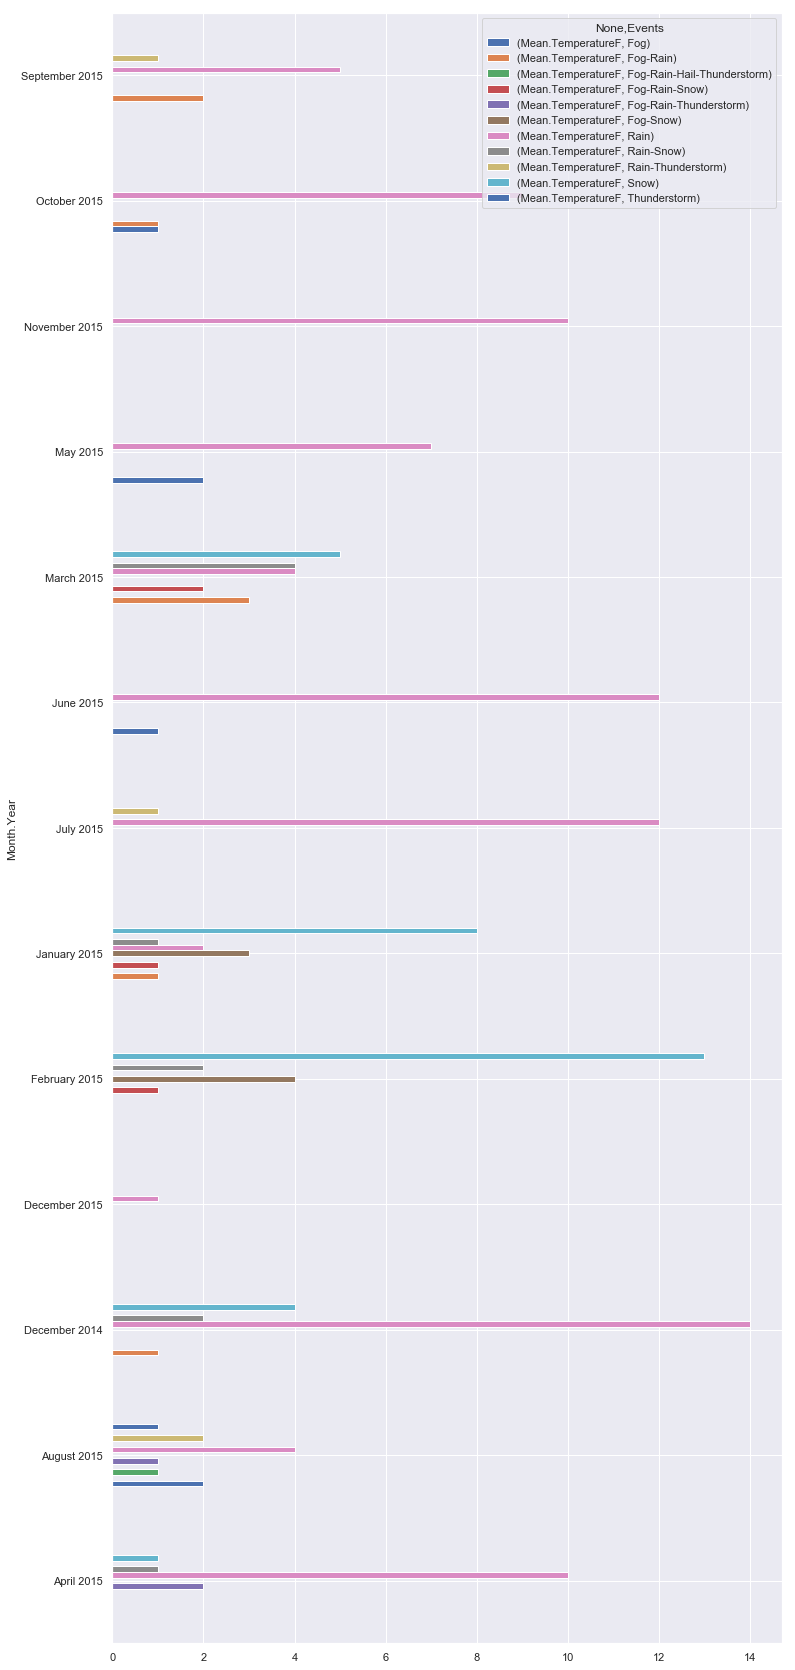

In [42]:
df["Month.Year"] = df["Date"].dt.month_name().astype(str) + " " + df["Date"].dt.year.astype(str)
df2 = df[df["Events"]!="None"]
mye = pd.pivot_table(df2, index = ["Month.Year"], columns = ["Events"], values = ["Mean.TemperatureF"], aggfunc = len, fill_value = 0)
sns.set()
mye.plot(kind = "barh", figsize = (12,30))

- <b> Rain </b> is the event that occurs the most in a month
- That month is <b>December of 2014</b>
- It occurs <b> 14 </b> Times

### Rolling Averages

#### Weekly 

Text(0.5, 1.0, 'Mean Temperature Weekly Rolling Avg')

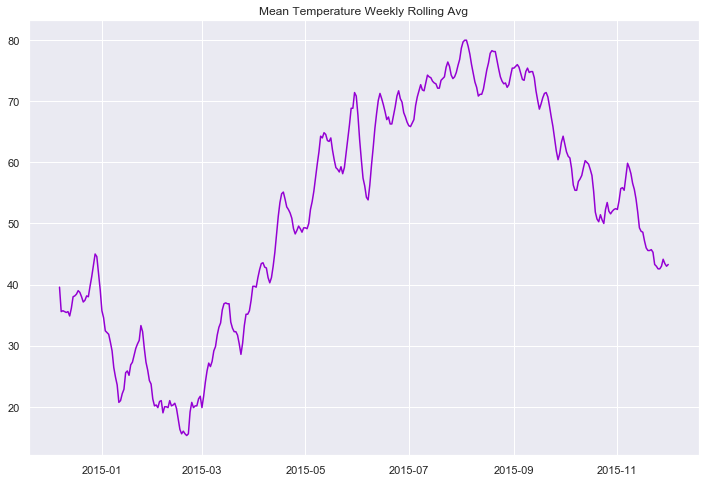

In [17]:
rweekly = df["Mean.TemperatureF"].rolling(7).mean()
figrw, axrw = plt.subplots(figsize = (12,8))
axrw.plot(df["Date"],rweekly, color = "darkviolet")
axrw.set_title("Mean Temperature Weekly Rolling Avg")

#### Monthly 

Text(0.5, 1.0, 'Mean Temperature Monthly Rolling Avg')

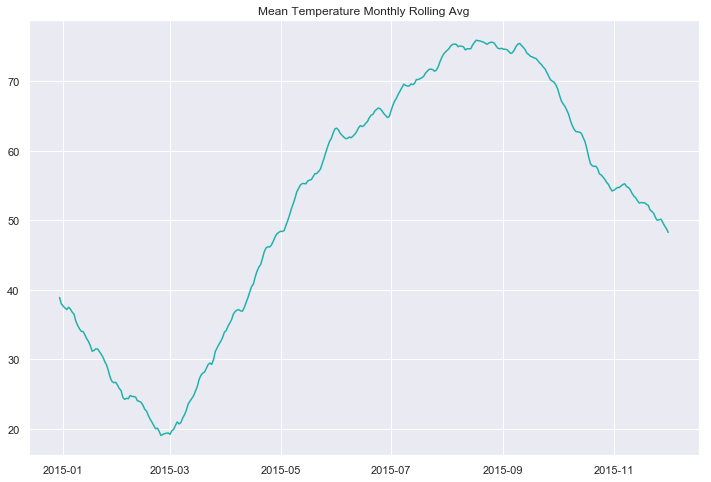

In [22]:
rmonthly = df["Mean.TemperatureF"].rolling(30).mean()
figrm, axrm = plt.subplots(figsize = (12,8))
axrm.plot(df["Date"],rmonthly, color = "lightseagreen")
axrm.set_title("Mean Temperature Monthly Rolling Avg")

### Min, Max and Avg Temperature for Each Month

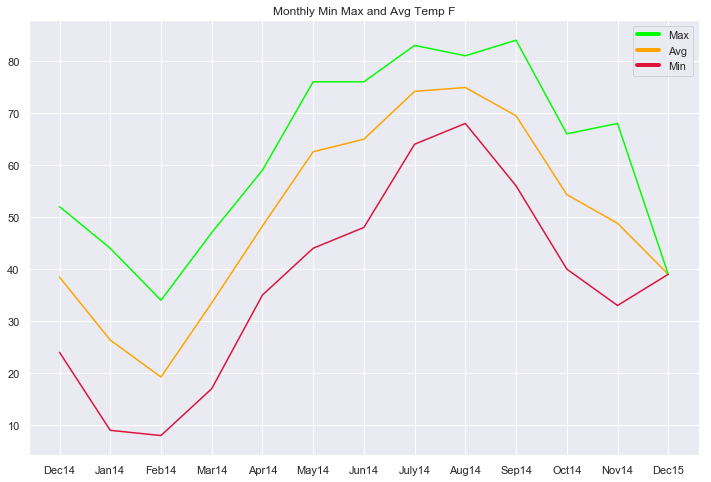

In [44]:
mean_t = df.groupby(pd.Grouper(key= "Date", freq='M', sort = True))[["Mean.TemperatureF"]].agg(np.mean)
high_t = df.groupby(pd.Grouper(key= "Date", freq='M', sort = True))[["Mean.TemperatureF"]].agg(np.max)
low_t = df.groupby(pd.Grouper(key= "Date", freq='M', sort = True))[["Mean.TemperatureF"]].agg(np.min)

fige, axe = plt.subplots(figsize = (12,8))
axe.plot(months, mean_t["Mean.TemperatureF"],color='orange')
axe.plot(months, high_t["Mean.TemperatureF"],color='lime')
axe.plot(months, low_t["Mean.TemperatureF"],color='crimson')
axe.set_title("Monthly Min Max and Avg Temp F")

custom_lines = [Line2D([0], [0], color='lime', lw=4), Line2D([0], [0], color="orange", lw=4), Line2D([0], [0], color="crimson", lw=4)]
axe.legend(custom_lines, ['Max', 'Avg', 'Min'])

- The Avg Temperature was the lowest in <b>February 2014</b>
- The Avg Temperature was the highest in <b>August 2014</b>
<br><br>
- The Min Temperature was the lowest in <b>February 2014</b>
- The Min Temperature was the highest in <b>August 2014</b>
<br><br>
- The Max Temperature was the lowest in <b>February 2014</b>
- The Max Temperature was the highest in <b>August 2014</b>

### Hottest and Coldest Days Each Month

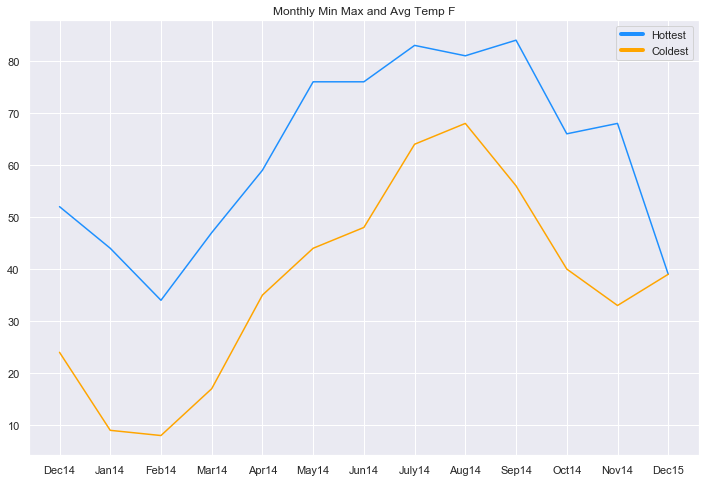

In [52]:
fige, axe = plt.subplots(figsize = (12,8))
axe.plot(months, high_t["Mean.TemperatureF"],color='dodgerblue')
axe.plot(months, low_t["Mean.TemperatureF"],color='orange')
axe.set_title("Monthly Min Max and Avg Temp F")

custom_lines = [Line2D([0], [0], color='dodgerblue', lw=4), Line2D([0], [0], color="orange", lw=4)]
axe.legend(custom_lines, ['Hottest', 'Coldest'])

### Identify the Seasons 

In [ ]:
##################################################